<a href="https://colab.research.google.com/github/sajeebju/Deep-Learning/blob/main/Augmentation_mledu_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [7]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [8]:
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

68616192/68606236 [==============================] - 0s 0us/step


In [9]:
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin = _URL, extract = True )

In [12]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE =  32
IMG_SIZE = (160, 160)

In [13]:
train_dataset = image_dataset_from_directory(train_dir, shuffle = True, batch_size = BATCH_SIZE, image_size = IMG_SIZE )
validation_dataset = image_dataset_from_directory(validation_dir, shuffle = True, batch_size = BATCH_SIZE, image_size = IMG_SIZE  )

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


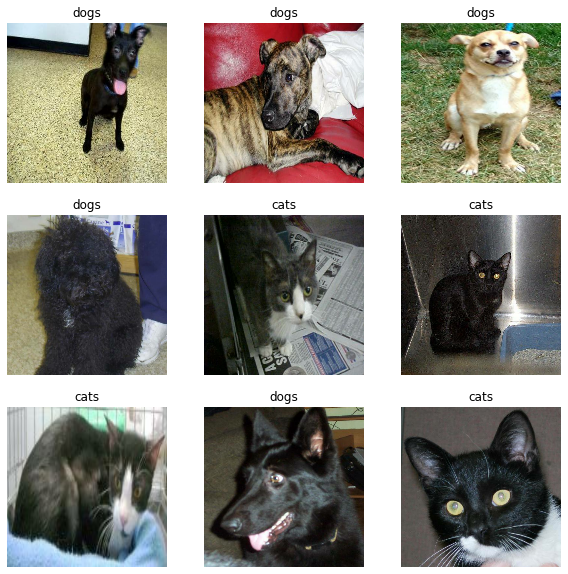

In [14]:
class_names = train_dataset.class_names
plt.figure(figsize = (10, 10))

for images, labels in train_dataset.take(2):
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [15]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))



Number of validation batches: 26
Number of test batches: 6


In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size= AUTOTUNE)


In [17]:
data_augmentation = tf.keras.Sequential([
                                         tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                         tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
                                         ])

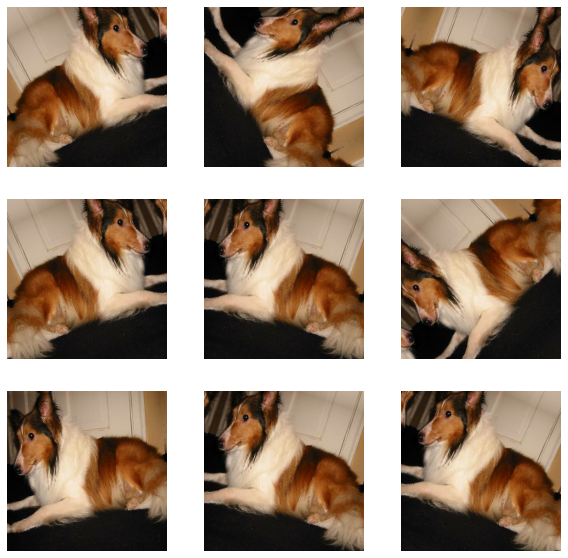

In [19]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize = (10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3,3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')